## 2.13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### (1) 데이터 가져오기

In [2]:
bike_train = pd.read_csv('../../../data/data/bike-sharing-demand/train.csv')
bike_test  = pd.read_csv('../../../data/data/bike-sharing-demand/test.csv')
# bike_train = pd.read_csv('02/data/train.csv')
# bike_test  = pd.read_csv('02/data/test.csv')

In [3]:
print(type(bike_train))
print(bike_train.shape)

<class 'pandas.core.frame.DataFrame'>
(10886, 12)


In [4]:
print(type(bike_test))
print(bike_test.shape)

<class 'pandas.core.frame.DataFrame'>
(6493, 9)


In [5]:
bike_train['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [6]:
bike_train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [7]:
bike_train['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [8]:
bike_train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### (2) `datetime` 컬럼을 `datetime` 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [9]:
# bike_train = pd.read_csv('../../../data/data/bike-sharing-demand/train.csv')
bike_train['year'] = pd.DatetimeIndex(bike_train['datetime']).year
bike_train['month'] = pd.DatetimeIndex(bike_train['datetime']).month
bike_train['day'] = pd.DatetimeIndex(bike_train['datetime']).day
bike_train['hour'] = pd.DatetimeIndex(bike_train['datetime']).hour
bike_train['minute'] = pd.DatetimeIndex(bike_train['datetime']).minute
bike_train['second'] = pd.DatetimeIndex(bike_train['datetime']).second
bike_train = bike_train[['year', 'month', 'day', 'hour','minute','second',
                        'season','holiday','workingday','weather','temp',
                        'atemp','humidity','windspeed','count']]
bike_train.head()

,year,month,day,hour,minute,second,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,0,0,1,0,0,1,9.84,14.395,81,0.0,16
1,2011,1,1,1,0,0,1,0,0,1,9.02,13.635,80,0.0,40
2,2011,1,1,2,0,0,1,0,0,1,9.02,13.635,80,0.0,32
3,2011,1,1,3,0,0,1,0,0,1,9.84,14.395,75,0.0,13
4,2011,1,1,4,0,0,1,0,0,1,9.84,14.395,75,0.0,1


In [10]:
bike_train.shape

(10886, 15)

In [11]:
bike_train['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

Text(0.5, 1.0, 'second')

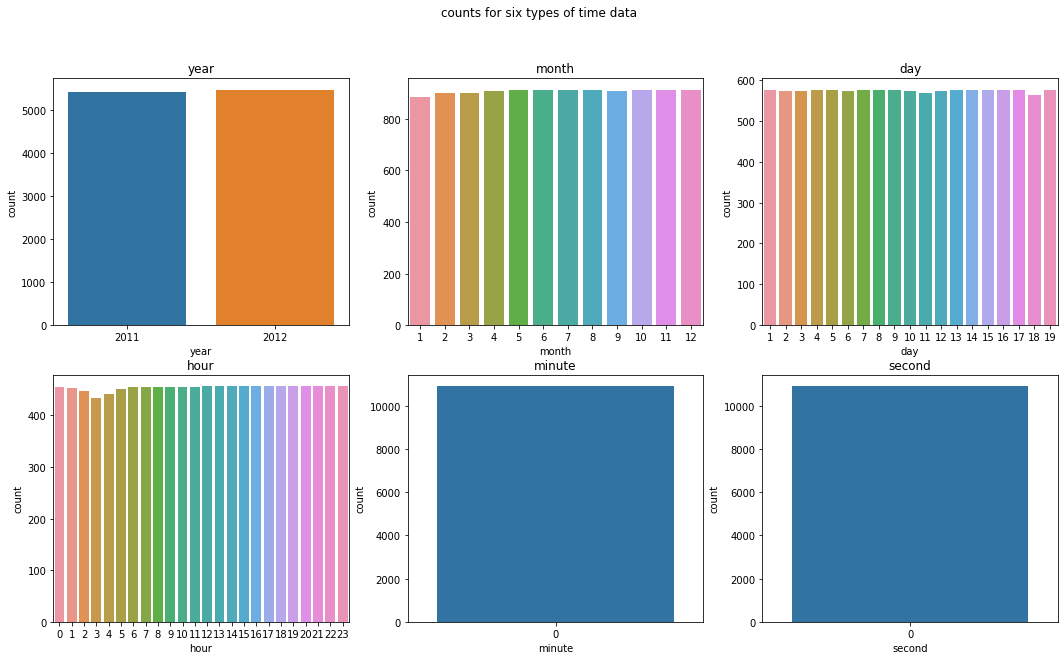

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('counts for six types of time data')

sns.countplot(ax=axes[0,0], x='year', data = bike_train)
axes[0,0].set_title('year')
sns.countplot(ax=axes[0,1], x='month', data = bike_train)
axes[0,1].set_title('month')
sns.countplot(ax=axes[0,2], x='day', data = bike_train)
axes[0,2].set_title('day')
sns.countplot(ax=axes[1,0], x='hour', data = bike_train)
axes[1,0].set_title('hour')
sns.countplot(ax=axes[1,1], x='minute', data = bike_train)
axes[1,1].set_title('minute')
sns.countplot(ax=axes[1,2], x='second', data = bike_train)
axes[1,2].set_title('second')

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [13]:
bike_train.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'second', 'season', 'holiday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'count'],
      dtype='object')

In [14]:
X = bike_train[['year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday',
                      'weather','temp','atemp','humidity','windspeed']].values
y = bike_train['count'].values

In [15]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(10886, 12)
(10886,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
print(type(X_train))
print(X_train.shape)
print(type(X_test))
print(X_test.shape)
print(type(y_train))
print(y_train.shape)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(8708, 12)
<class 'numpy.ndarray'>
(2178, 12)
<class 'numpy.ndarray'>
(8708,)
<class 'numpy.ndarray'>
(2178,)


### (5) LinearRegression 모델 학습

In [18]:
model = LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions = model.predict(X_test)
print(y_test)
print(predictions)

[308  14 539 ...  52 244 213]
[183.45804656  65.66257346 382.35151225 ...  67.21021625 277.56414586
 161.73883052]


In [21]:
df = pd.DataFrame(np.array([y_test,predictions]).T)
df

,0,1
0,308.0,183.458047
1,14.0,65.662573
2,539.0,382.351512
3,143.0,313.406088
4,1.0,172.466294
...,...,...
2173,41.0,152.379164
2174,5.0,85.272216
2175,52.0,67.210216
2176,244.0,277.564146


In [22]:
rmse = mean_squared_error(y_test, predictions)**.5
rmse

145.23373923745692

실험 (반복 셀)

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [28]:
print(len(y_test))
print(len(X_test[:,8]))
print(len(X_test[:,10]))

2178
2178
2178


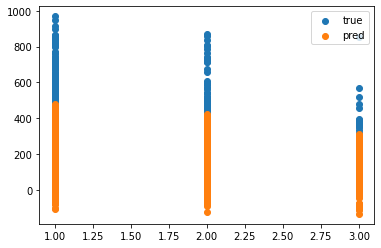

In [27]:
plt.scatter(X_test[:, 7], y_test, label="true")
plt.scatter(X_test[:, 7], predictions, label="pred")
plt.legend()
plt.show()

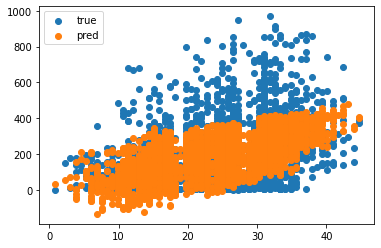

In [26]:
plt.scatter(X_test[:, 9], y_test, label="true")
plt.scatter(X_test[:, 9], predictions, label="pred")
plt.legend()
plt.show()